In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
original_image = cv2.imread("C:/Semester4/digital_image_processing/dip_project/images/original_image.jpg")

In [4]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 1

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0

    return noisy_image

In [5]:
def restore_image(image, filter_size):
    restored_image = cv2.medianBlur(image, filter_size)
    return restored_image

In [6]:
# Add salt and pepper noise
salt_prob = 0.01 
pepper_prob = 0.01 
noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

In [7]:
# Restore the image using median filter
filter_size = 3 
restored_image = restore_image(noisy_image, filter_size)

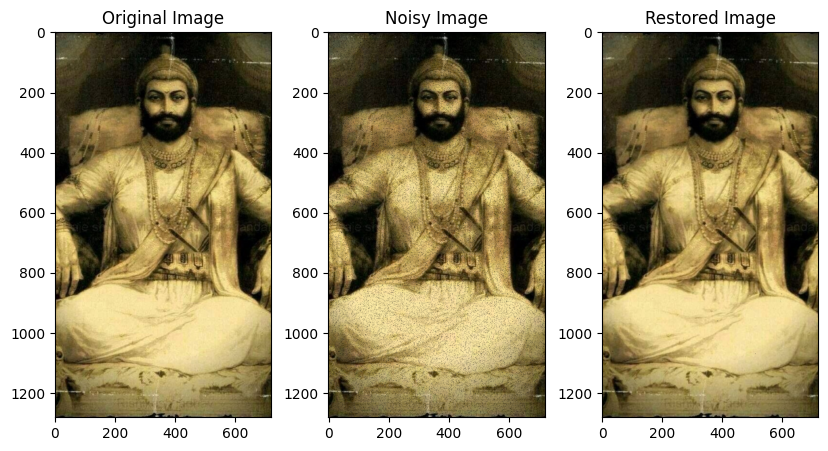

In [8]:
# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv2.cvtColor(noisy_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')

plt.subplot(133)
plt.imshow(cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB))
plt.title('Restored Image')

plt.show()

In [9]:
cv2.imwrite("images/salt_peppered_image.jpg", noisy_image)
cv2.imwrite("images/restored_salt_pepper_image.jpg", restored_image)

True